In [1]:
# # Update sklearn to prevent version mismatches
# !pip install sklearn --upgrade

In [2]:
# # install joblib. This will be used to save your model. 
# # Restart your kernel after installing 
# !pip install joblib

In [3]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

# Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [5]:
# Get names of cols
df.columns

Index(['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')

In [6]:
# Set features. This will also be used as your x values.
selected_features = df[['koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2',]]

# Create a Train Test Split

Use `koi_disposition` for the y values

In [17]:
X = selected_features
y = df[['koi_disposition']]
print(X.shape, y.shape)

(6991, 7) (6991, 1)


In [8]:
# Encode y
# NOT NEC
label_encoder = LabelEncoder()

y_data = y.copy()

label_encoder.fit(y)
label_encoder.classes_
y_encoded = label_encoder.transform(y)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, random_state=42, stratify=y)

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [10]:
# Scale your data
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

k: 1, Train/Test Score: 0.975/0.554
k: 6, Train/Test Score: 0.681/0.569
k: 11, Train/Test Score: 0.662/0.599
k: 16, Train/Test Score: 0.652/0.618
k: 21, Train/Test Score: 0.646/0.623
k: 26, Train/Test Score: 0.646/0.627
k: 31, Train/Test Score: 0.643/0.630
k: 36, Train/Test Score: 0.640/0.630
k: 41, Train/Test Score: 0.640/0.633
k: 46, Train/Test Score: 0.636/0.630
k: 51, Train/Test Score: 0.637/0.631
k: 56, Train/Test Score: 0.636/0.629
k: 61, Train/Test Score: 0.635/0.630
k: 66, Train/Test Score: 0.636/0.628
k: 71, Train/Test Score: 0.635/0.630
k: 76, Train/Test Score: 0.634/0.630


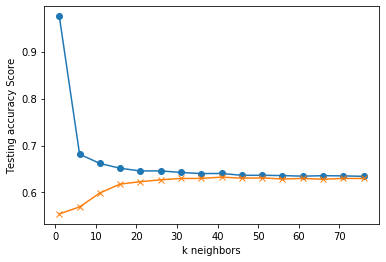

In [11]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 80, 5):
    model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=k))
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
plt.plot(range(1, 80, 5), train_scores, marker='o')
plt.plot(range(1, 80, 5), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

# Train the Model



In [18]:
# Note that k: 9 provides the best accuracy where the classifier starts to stablize
knn = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=41))
knn.fit(X_train, y_train)
print('k=41 Test Acc: %.3f' % knn.score(X_test, y_test))

k=41 Test Acc: 0.633


In [19]:
print(f"Training Data Score: {knn.score(X_train, y_train)}")
print(f"Testing Data Score: {knn.score(X_test, y_test)}")

Training Data Score: 0.6404730116345604
Testing Data Score: 0.6327231121281465


In [20]:
#Checking performance our model with classification report.

# Set value for actual predictions
y_pred = knn.predict(X_test)

# Report based on test, predictions, and use target names
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

                precision    recall  f1-score   support

     CANDIDATE       0.39      0.03      0.06       422
     CONFIRMED       0.62      0.64      0.63       450
FALSE POSITIVE       0.64      0.92      0.76       876

      accuracy                           0.63      1748
     macro avg       0.55      0.53      0.48      1748
  weighted avg       0.58      0.63      0.56      1748



# Hyperparameter Tuning - ???

Use `GridSearchCV` to tune the model's parameters

In [ ]:
# Code from class
pipe = make_pipeline(model)
pipe

# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(pipe, param_grid, verbose=3)

In [ ]:
# Code from class continued
grid.fit(X_train, y_train)

In [15]:
from sklearn import set_config
set_config(display="diagram")

pipe = make_pipeline(model)
pipe

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler()),
                                 ('kneighborsclassifier',
                                  KNeighborsClassifier(n_neighbors=76))]))])

In [ ]:
# LEFT OFF HERE

# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV

leaf_size = list(range(1,20))
n_neighbors = 41

hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors)

knn_2 = KNeighborsClassifier()

#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters)

#Fit the model
best_model = clf.fit(X_train, y_train)

#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'your_name.sav'
joblib.dump(your_model, filename)